# Expedia Hotel Recommendations

![43383736_15364854024481_rId9.jpg](attachment:43383736_15364854024481_rId9.jpg)

**Planning your dream vacation, or even a weekend escape, can be an overwhelming affair. With hundreds, even thousands, of hotels to choose from at every destination, it's difficult to know which will suit your personal preferences. Should you go with an old standby with those pillow mints you like, or risk a new hotel with a trendy pool bar?**

![expedia_icons.png](attachment:expedia_icons.png)

**Expedia wants to take the proverbial rabbit hole out of hotel search by providing personalized hotel recommendations to their users. This is no small task for a site with hundreds of millions of visitors every month!**

**Currently, Expedia uses search parameters to adjust their hotel recommendations, but there aren't enough customer specific data to personalize them for each user. In this competition, Expedia is challenging Kagglers to contextualize customer data and predict the likelihood a user will stay at 100 different hotel groups.**

## Data Description

**Expedia has provided us logs of customer behavior. These include what customers searched for, how they interacted with search results (click/book), whether or not the search result was a travel package.**

**Expedia is interested in predicting which hotel group a user is going to book. Expedia has in-house algorithms to form hotel clusters, where similar hotels for a search (based on historical price, customer star ratings, geographical locations relative to city center, etc) are grouped together. These hotel clusters serve as good identifiers to which types of hotels people are going to book, while avoiding outliers such as new hotels that don't have historical data.**

**Our goal is to predict the booking outcome (hotel cluster) for a user event, based on their search and other attributes associated with that user event.** 

## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Datasets

In [ ]:
train=pd.read_csv('train.csv', nrows=100000)
test=pd.read_csv('test.csv', nrows=100000)

**The Dataset contains 37 million logs of customer behaviour, to avoid hang and lagging of system I have selected 100000 logs and entries from each of the dataset i.e train and test dataset.**

In [ ]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [ ]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [ ]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


**All the dates in test.csv are 1 year later than the dates in train.csv .The testing set contains dates from 2015 ,and the training set contains dates from 2013 and 2014.**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63078 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99929 non-null object
srch_co                      99929 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int64
srch_destination_type

In [ ]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


## Description of each Column

![Screenshot%20%28335%29.png](attachment:Screenshot%20%28335%29.png)

![Screenshot%20%28336%29.png](attachment:Screenshot%20%28336%29.png)

In [ ]:
train = pd.read_csv('train.csv', parse_dates=['date_time'] ,sep=',',nrows=200000)

In [ ]:
train.shape

(200000, 24)

In [ ]:
train.dtypes

date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                              object
srch_co                              object
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                            int64
cnt                                   int64
hotel_continent                       int64
hotel_country                         int64
hotel_market                    

## What we're predicting?

**Our goal is to predict the booking outcome (hotel cluster) for a user event, based on their search and other attributes associated with that user event. According to the description given by Expedia, there are 100 clusters in total.**

## Missing Values

In [ ]:
train.isnull().sum()


date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    69637
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        177
srch_co                        177
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
orig_destination_distance,69637,0.348185
srch_ci,177,0.000885
srch_co,177,0.000885
channel,0,0.000000
site_name,0,0.000000
posa_continent,0,0.000000
user_location_country,0,0.000000
user_location_region,0,0.000000
user_location_city,0,0.000000
user_id,0,0.000000


In [ ]:
total=test.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

ipykernel_launcher:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Total,Percent
channel,0.0,0.000000
cnt,NaN,0.000000
date_time,0.0,0.000000
hotel_cluster,NaN,0.000000
hotel_continent,0.0,0.000000
hotel_country,0.0,0.000000
hotel_market,0.0,0.000000
id,0.0,NaN
is_booking,NaN,0.000000
is_mobile,0.0,0.000000


 remove the missing values & impute values for orig_destination_distance

In [ ]:
train['orig_destination_distance'].fillna(train['orig_destination_distance'].mean(), inplace=True)
test['orig_destination_distance'].fillna(test['orig_destination_distance'].mean(), inplace=True)

In [ ]:
train.isnull().sum()

date_time                      0
site_name                      0
posa_continent                 0
user_location_country          0
user_location_region           0
user_location_city             0
orig_destination_distance      0
user_id                        0
is_mobile                      0
is_package                     0
channel                        0
srch_ci                      177
srch_co                      177
srch_adults_cnt                0
srch_children_cnt              0
srch_rm_cnt                    0
srch_destination_id            0
srch_destination_type_id       0
is_booking                     0
cnt                            0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_cluster                  0
dtype: int64

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
train.shape

(199823, 24)

In [ ]:
test.shape

(39999, 22)

## Visualization

### 1. Corelation between the columns

**A Heatmap to infer the correlation between different columns with each other and to check if there is any linear correlation between any columns.**

<AxesSubplot:>

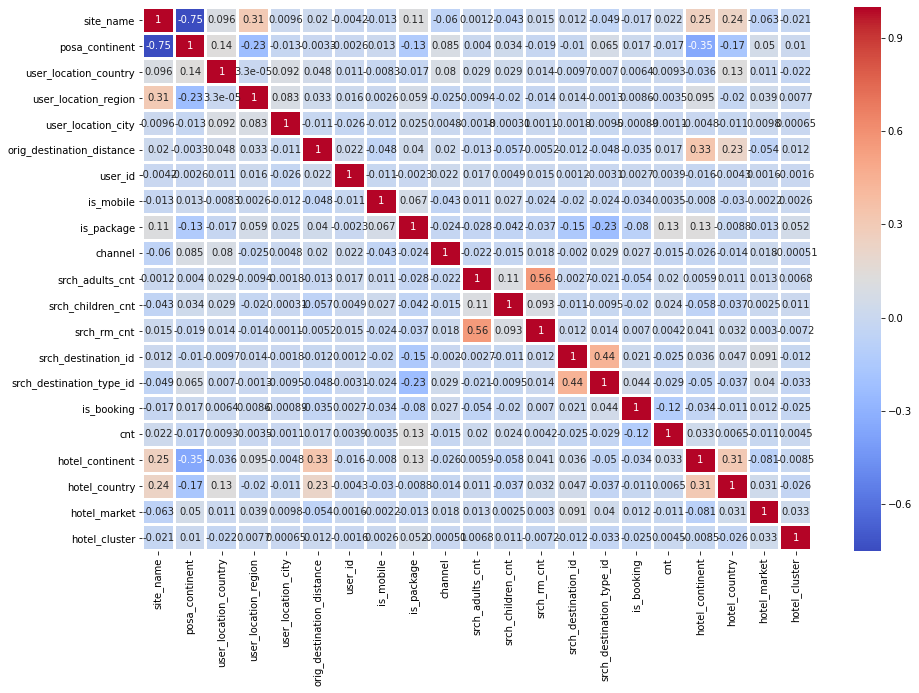

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

**This tell us that no column correlate linearly with any other column in the dataset.**

### 2. Frequency of bookings through mobile

<AxesSubplot:xlabel='is_mobile', ylabel='count'>

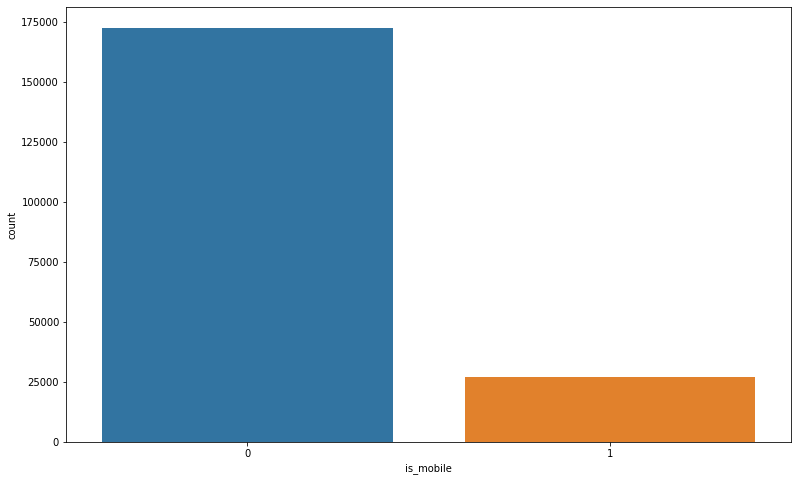

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_mobile',data=train, order=[0,1],ax=ax)

**Customers book their hotels from Expedia Website rather than mobile. So we can suggest Expedia to make more interactive, easy to use website so customers can easily book their hotels**

### 3. Frequency of bookings with total package(i.e with travel)

<AxesSubplot:xlabel='is_package', ylabel='count'>

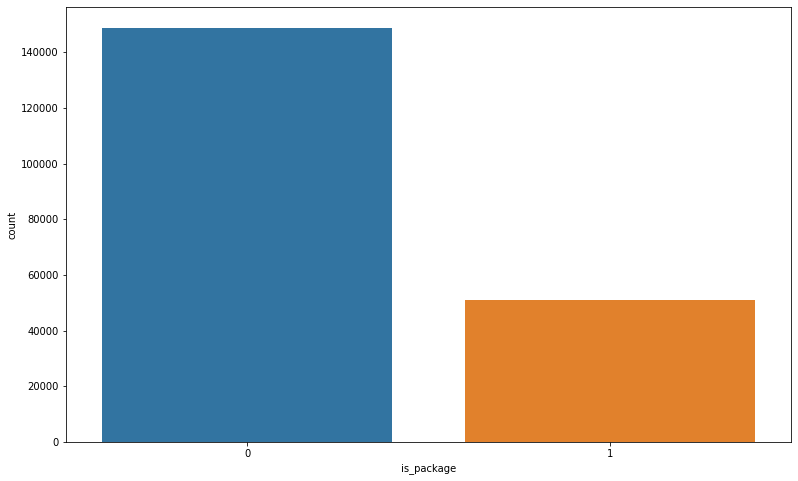

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_package',data=train, order=[0,1], ax=ax)

**The number of customers booking their hotels with total package i.e with travel are less. We can interpret this that there can be many reasons of this like booking with travel is getting very expensive or less range of hotels where the customer wants to travel to.**

### 4. Frequency of Continent site used for booking

<AxesSubplot:xlabel='posa_continent', ylabel='count'>

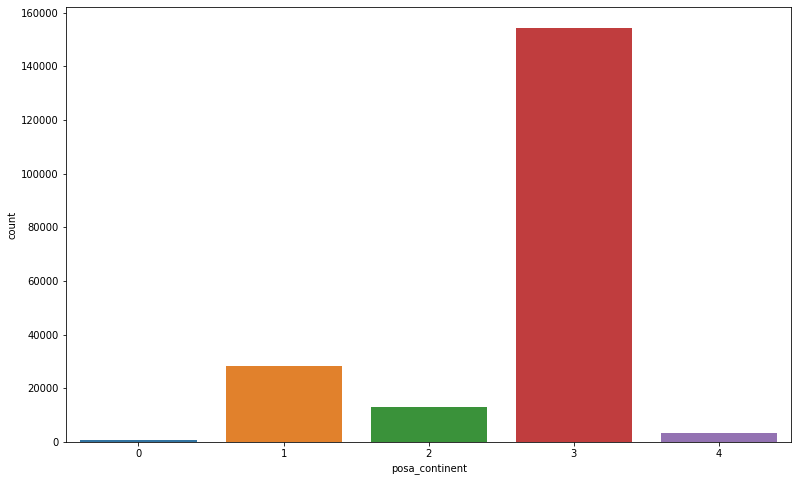

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('posa_continent', data=train,order=[0,1,2,3,4],ax=ax)

**Most of people booking are from continent 3. Maybe people there have more expending power. So Expedia can increase its business by increasing more hotel options, more variety, better user experience, etc. For other continents Expedia can lower its prices on hotel or give discounts, loyalty points.**

### 5. Which continent has the most number of hotels?

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

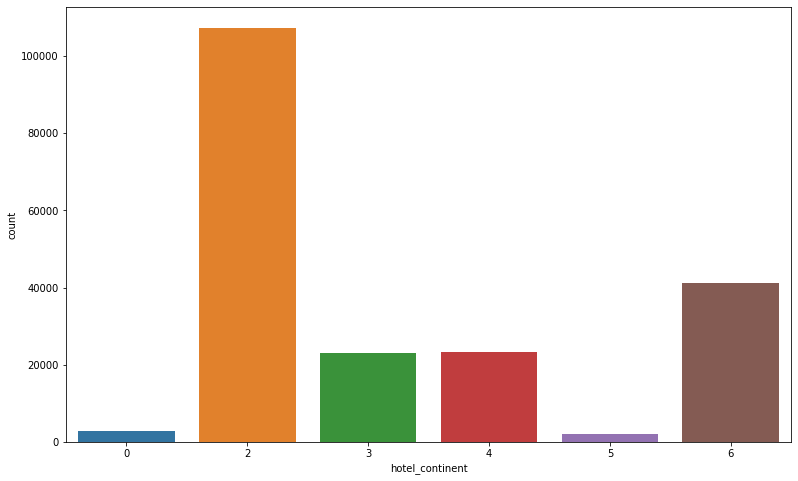

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('hotel_continent', data=train,order=[0,2,3,4,5,6],ax=ax)

### 6. Putting the two above together

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

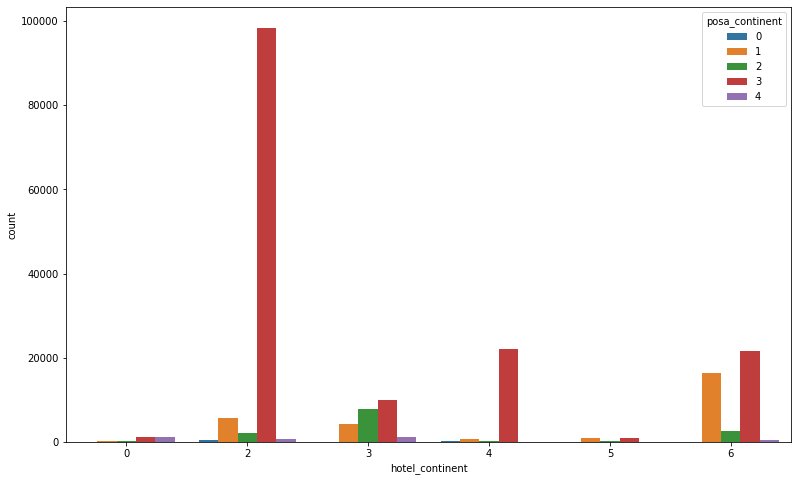

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

## Let us look at data specifically where customers have made a booking

In [ ]:
bookings=train[train["is_booking"] == 1]

### 7. What are the most countries the customer travel from?

<AxesSubplot:xlabel='user_location_country', ylabel='count'>

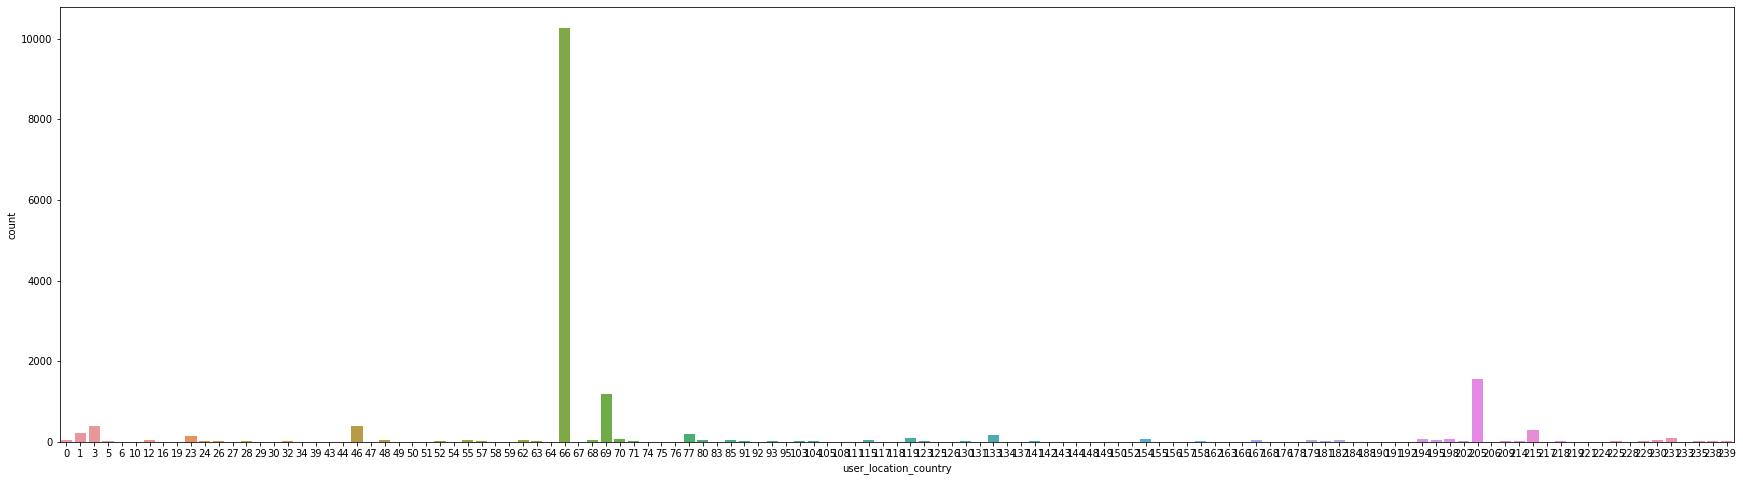

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
sns.countplot('user_location_country',data=bookings.sort_values(by=['user_location_country']))

**If customers are travelling from 66th country the most, we can give an insight to Expedia to give discounts to regular and most frequent customers to boost the business and to see why other countries have so low bookings of hotels, is it beacuse of the price, less number of hotels, less facilities in a hotel.**

### 8. What are the most countries the customer travel to?

<AxesSubplot:xlabel='hotel_country', ylabel='count'>

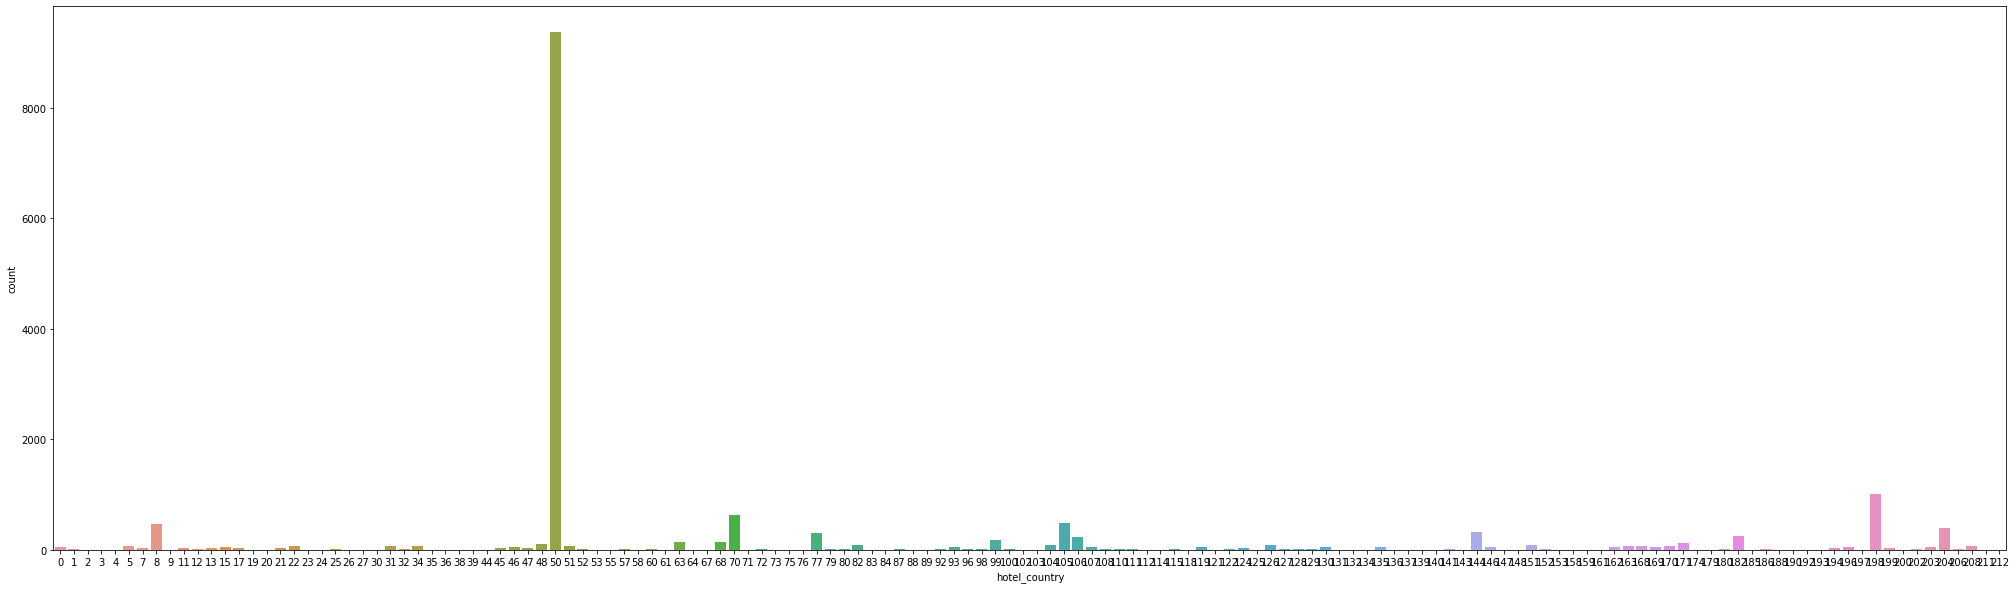

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(35,10)
sns.countplot('hotel_country',data=bookings.sort_values(by=['hotel_country']))

**If customers are travelling to 50th country the most, we can give an insight to Expedia to give more recommendations of different hotel with different range of prices, with different facilities, with different locations i.e hotels in every region, every city of the 50th country.**

### 9. How many people by continent are booking from mobile?

<AxesSubplot:xlabel='posa_continent', ylabel='count'>

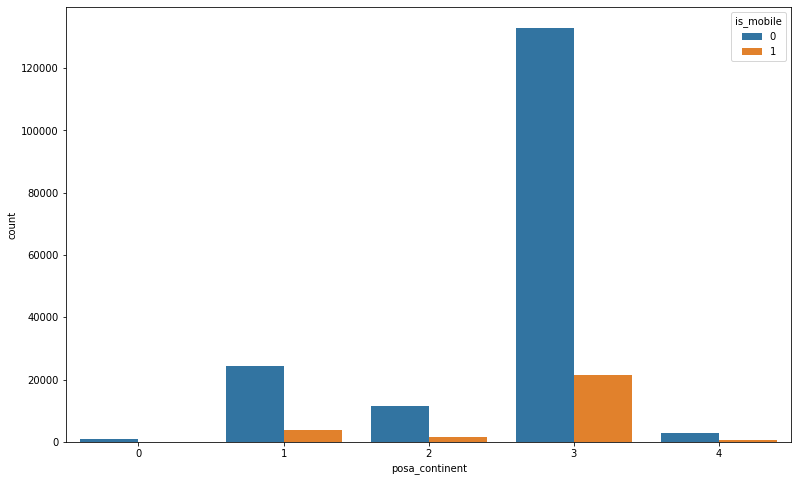

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

**This graph we can use to give an insight to Expedia that to improve desktop website interface and to make it more interactive, easy payment and website doesn't crash when lot of customer tries to book their ticket rather than on mobile interface** 

### 10. How many people by country are booking from mobile?

<AxesSubplot:xlabel='user_location_country', ylabel='count'>

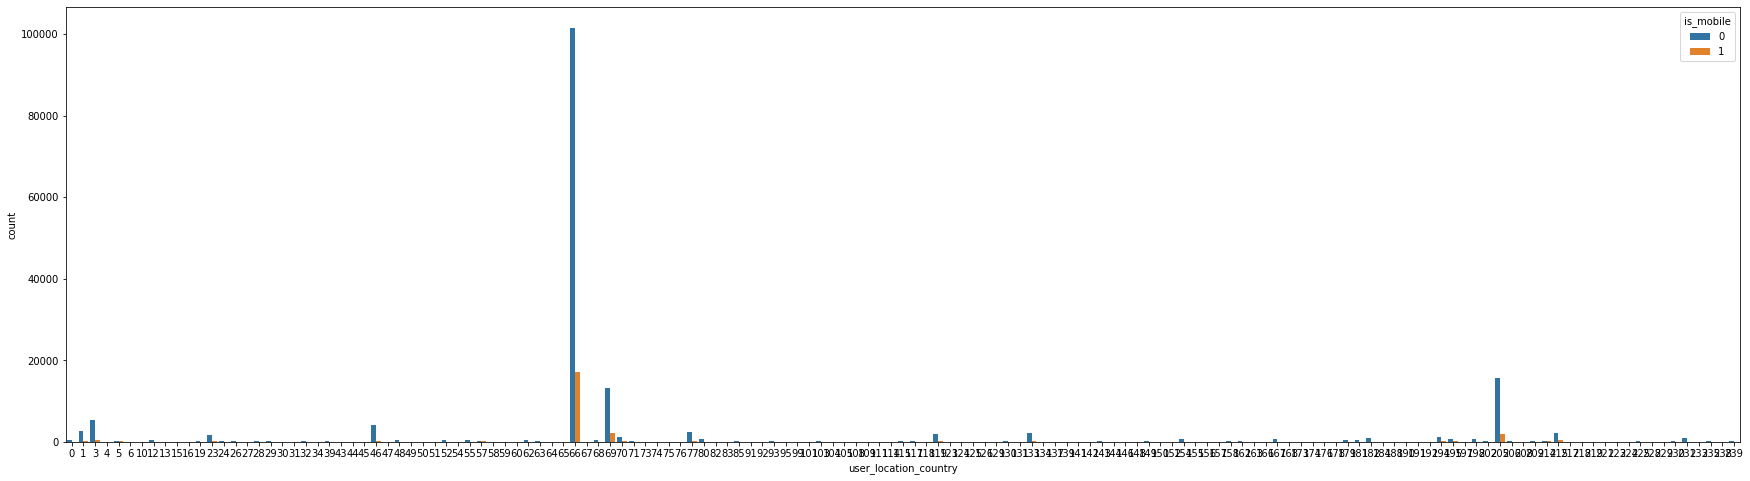

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x='user_location_country', hue='is_mobile', data = train)

### 11. Frequency for each hotel Clusters

<AxesSubplot:>

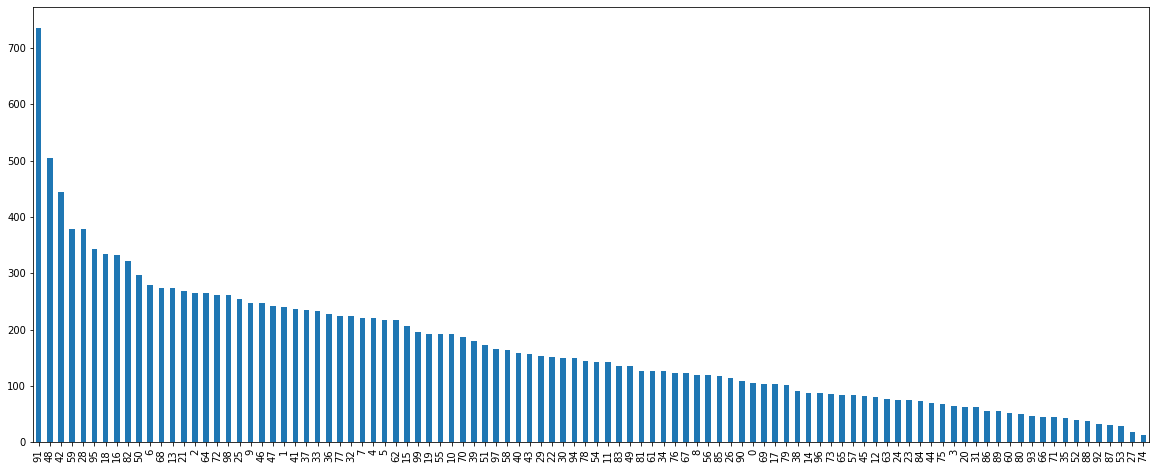

In [ ]:
bookings['hotel_cluster'].value_counts().plot(kind='bar',figsize=(20,8))

Hotel cluster 91 is the most booked hotel

### 12. What's the most impactful channel?

<AxesSubplot:xlabel='channel', ylabel='count'>

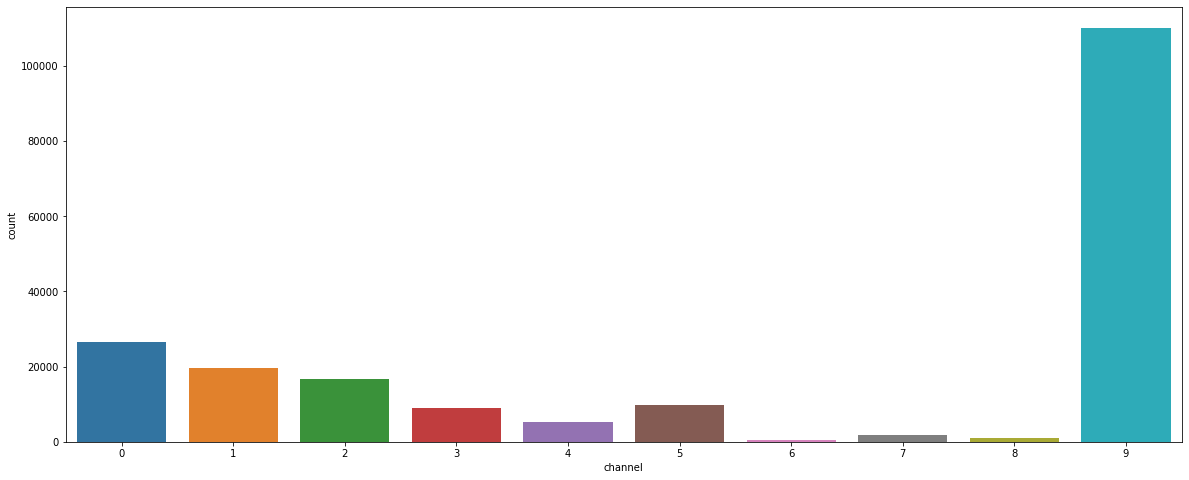

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='channel', order=list(range(0,10)), data=train)

Marketing channel 9 is the most successful

## Feature Engineering

**We can find out the duration of stay of the customers by subtracting the date of check-in to check-out to help Expedia to categorize the hotels like "Long Trips" where customers book their hotels for long period of time or "Short Trips" where customers book their hotels for short period of time. This could help to recommend other customers when those customers choose the same search parameters like "Long Trips" and "Short Trips".**

**Moreover if we seprate day, month and year it can also help us to find the business of Expedia over the years i.e customers booking in which year, month or day the most.**

In [ ]:
def convert_date_into_days(df):
    #datetime features
    df['srch_ci']=pd.to_datetime(df['srch_ci'],infer_datetime_format = True,errors='coerce')
    df['srch_co']=pd.to_datetime(df['srch_co'],infer_datetime_format = True,errors='coerce')
    
    df['stay_duration'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_prior_days_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
#     For hotel check-in
#     Month, Year, Day
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)
    return df

In [ ]:
train = convert_date_into_days(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199823 entries, 0 to 199999
Data columns (total 29 columns):
date_time                    199823 non-null datetime64[ns]
site_name                    199823 non-null int64
posa_continent               199823 non-null int64
user_location_country        199823 non-null int64
user_location_region         199823 non-null int64
user_location_city           199823 non-null int64
orig_destination_distance    199823 non-null float64
user_id                      199823 non-null int64
is_mobile                    199823 non-null int64
is_package                   199823 non-null int64
channel                      199823 non-null int64
srch_ci                      199823 non-null datetime64[ns]
srch_co                      199823 non-null datetime64[ns]
srch_adults_cnt              199823 non-null int64
srch_children_cnt            199823 non-null int64
srch_rm_cnt                  199823 non-null int64
srch_destination_id          199823 non-null

In [ ]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_duration,no_of_prior_days_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4.0,15.0,27,8,2014
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4.0,17.0,29,8,2014
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4.0,17.0,29,8,2014
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5.0,105.0,23,11,2014
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5.0,105.0,23,11,2014


### 13. How many bookings in each year?

<AxesSubplot:xlabel='Cin_year', ylabel='count'>

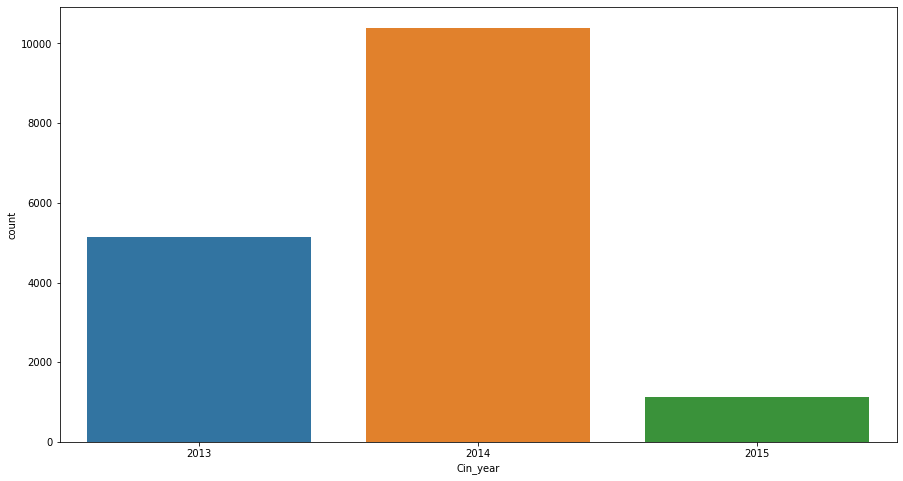

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot('Cin_year',data=train[train['is_booking']==1])

**Bookings by customer in each year. This helps us to understand Expedia business i.e in 2013 was good, then during 2014 Expedia's business was at its peak then in 2015 Expedia's business was at its worst**

### 14. How many bookings in each month?

<AxesSubplot:xlabel='Cin_month', ylabel='count'>

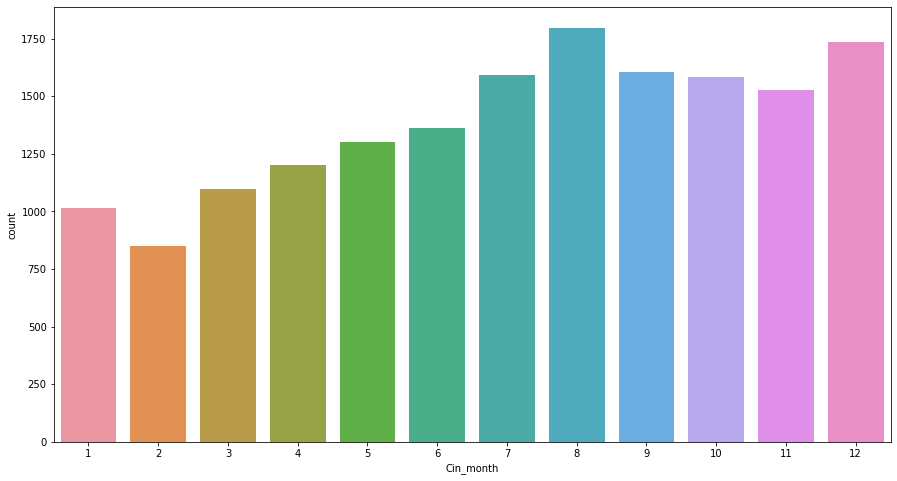

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot('Cin_month',data=train[train['is_booking']==1],order=list(range(1,13)))

**This graph tells us about the customer behaviour that is when the customer are more likely to book their hotels and want to travel with their family.**

**According to the graph we can deduce that during 8th month which is August, customers book hotels the most.** 

### 15. How many bookings in each day?

<AxesSubplot:xlabel='Cin_day', ylabel='count'>

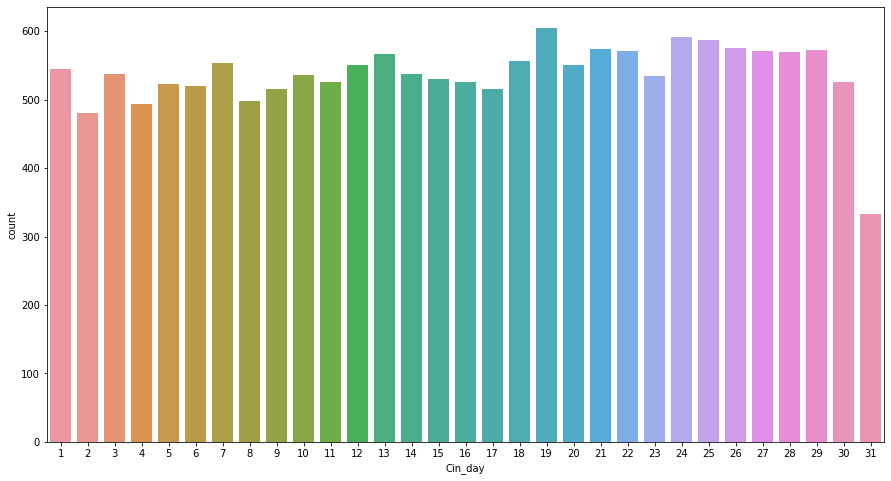

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot('Cin_day',data=train[train['is_booking']==1])

**According to the graph we can deduce that on 1st day of any month customers are likely more to travel and book hotels.**

**On 1st of each month customers get their salary and at that point they plan their trip**

### 16. Total Booking over the years

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


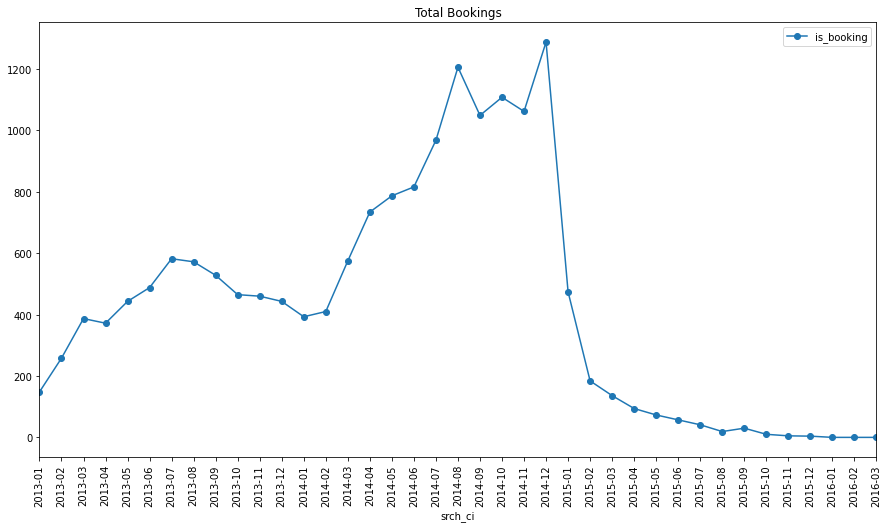

In [ ]:
no_of_bookings=train['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
date_bookings  = train.groupby(no_of_bookings)["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,8)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

**A clear graph to follow the Expedia Business over the years 2013,2014,2015 and 2016, its high points and its low point**

### 17. Frequency of stay duration booked by customers

<AxesSubplot:xlabel='stay_duration', ylabel='count'>

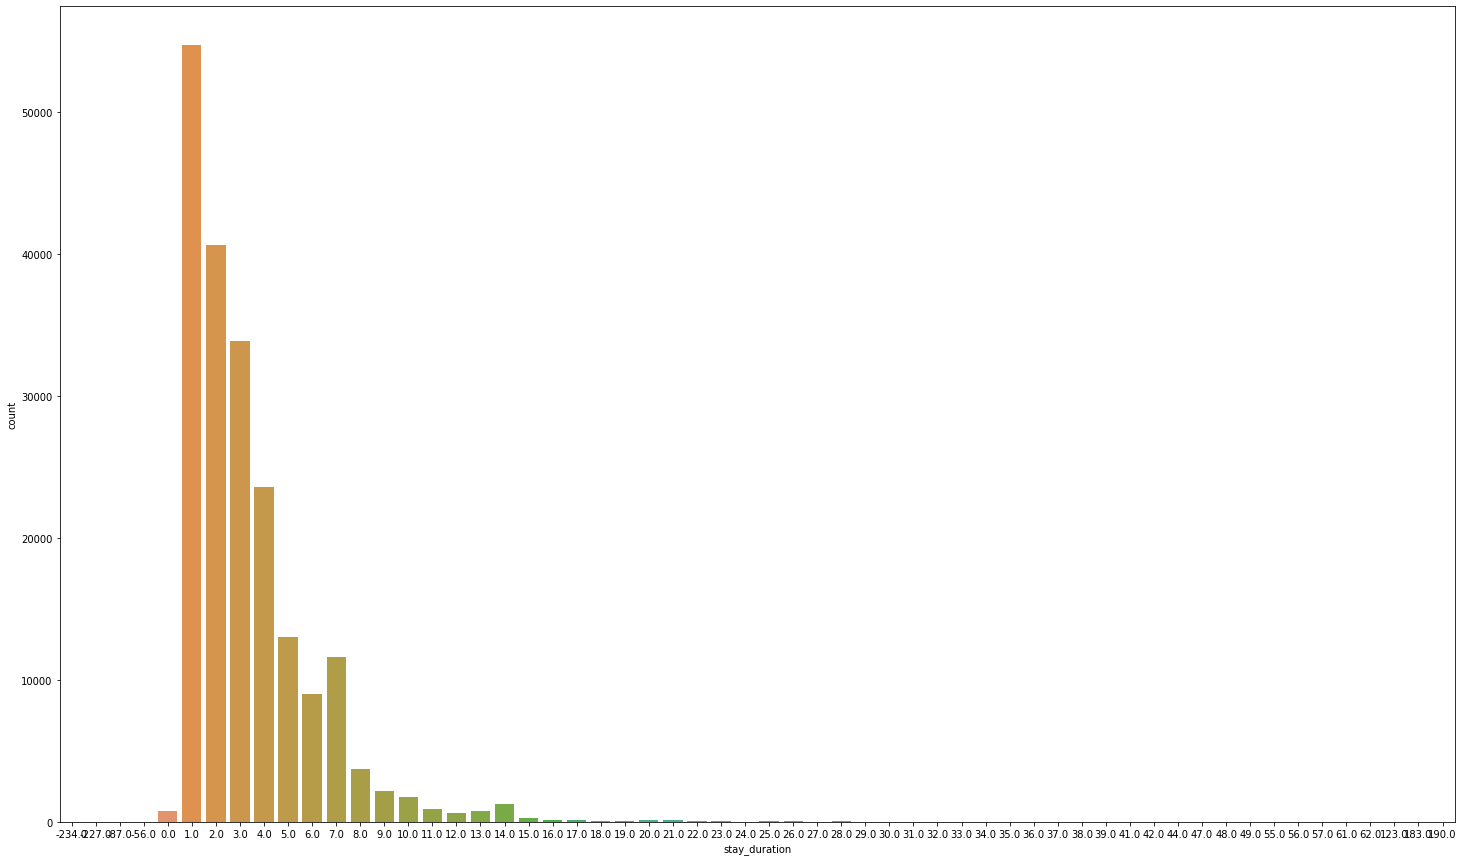

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.countplot(x="stay_duration", data=train)

In [ ]:
train['stay_duration'].max()

190.0

## Data Cleaning 

**Data cleaning is the process of cleaning / standardising the data to make it ready for analysis. Most of times, there will be discrepancies in the captured data such as incorrect data formats, missing data, errors while capturing the data.**

In [ ]:
train.corr()["hotel_cluster"]

site_name                   -0.021180
posa_continent               0.010042
user_location_country       -0.021887
user_location_region         0.007733
user_location_city           0.000651
orig_destination_distance    0.011877
user_id                     -0.001641
is_mobile                    0.002645
is_package                   0.051934
channel                     -0.000509
srch_adults_cnt              0.006847
srch_children_cnt            0.011422
srch_rm_cnt                 -0.007158
srch_destination_id         -0.012461
srch_destination_type_id    -0.032532
is_booking                  -0.025482
cnt                          0.004474
hotel_continent             -0.008548
hotel_country               -0.026294
hotel_market                 0.032740
hotel_cluster                1.000000
stay_duration                0.043633
no_of_prior_days_booking     0.027411
Cin_day                     -0.000919
Cin_month                    0.000413
Cin_year                     0.009051
Name: hotel_

This tell us that no column correlate linearly with hotel_cluster.

**Removing unnecessary columns**

In [ ]:
columns = ['date_time', 'srch_ci', 'srch_co']
train.drop(columns=columns,axis=1,inplace=True)
test.drop(columns=columns,axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199823 entries, 0 to 199999
Data columns (total 26 columns):
site_name                    199823 non-null int64
posa_continent               199823 non-null int64
user_location_country        199823 non-null int64
user_location_region         199823 non-null int64
user_location_city           199823 non-null int64
orig_destination_distance    199823 non-null float64
user_id                      199823 non-null int64
is_mobile                    199823 non-null int64
is_package                   199823 non-null int64
channel                      199823 non-null int64
srch_adults_cnt              199823 non-null int64
srch_children_cnt            199823 non-null int64
srch_rm_cnt                  199823 non-null int64
srch_destination_id          199823 non-null int64
srch_destination_type_id     199823 non-null int64
is_booking                   199823 non-null int64
cnt                          199823 non-null int64
hotel_continent     

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 39998
Data columns (total 19 columns):
id                           39999 non-null int64
site_name                    39999 non-null int64
posa_continent               39999 non-null int64
user_location_country        39999 non-null int64
user_location_region         39999 non-null int64
user_location_city           39999 non-null int64
orig_destination_distance    39999 non-null float64
user_id                      39999 non-null int64
is_mobile                    39999 non-null int64
is_package                   39999 non-null int64
channel                      39999 non-null int64
srch_adults_cnt              39999 non-null int64
srch_children_cnt            39999 non-null int64
srch_rm_cnt                  39999 non-null int64
srch_destination_id          39999 non-null int64
srch_destination_type_id     39999 non-null int64
hotel_continent              39999 non-null int64
hotel_country                39999 non-

In [ ]:
Y = train['hotel_cluster']
X = train.drop(['hotel_cluster'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199823 entries, 0 to 199999
Data columns (total 25 columns):
site_name                    199823 non-null int64
posa_continent               199823 non-null int64
user_location_country        199823 non-null int64
user_location_region         199823 non-null int64
user_location_city           199823 non-null int64
orig_destination_distance    199823 non-null float64
user_id                      199823 non-null int64
is_mobile                    199823 non-null int64
is_package                   199823 non-null int64
channel                      199823 non-null int64
srch_adults_cnt              199823 non-null int64
srch_children_cnt            199823 non-null int64
srch_rm_cnt                  199823 non-null int64
srch_destination_id          199823 non-null int64
srch_destination_type_id     199823 non-null int64
is_booking                   199823 non-null int64
cnt                          199823 non-null int64
hotel_continent     

## Dividing the train dataset into 2 parts

1. Learning Dataset
2. Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print(len(X_train))
print(len(X_test))

169849
29974


## Baseline accuracy

In [ ]:
from sklearn.metrics import accuracy_score
test_rows = Y_test.shape[0]
predicted_values = np.ones(test_rows) * 91
accuracy_score(Y_test, predicted_values)

0.030059384800160138

In [ ]:
Y_test.shape[0]

29974

## 1. First Algorithm - Random Forest

---



**Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Training

rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train, Y_train)

#Prediction

rf_train_prediction = rf.predict(X_train)
rf_test_prediction = rf.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train,rf_train_prediction)
test_accuracy = accuracy_score(Y_test,rf_test_prediction)
rf_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Hyperparameter tuning ------ Go ahead and experiment with it ------

In [ ]:
train.shape

In [ ]:
train_subset = train.sample(700)

In [ ]:
train_subset.head()

In [ ]:
train_subset.shape

In [ ]:
X_subset = train.drop(['hotel_cluster'],axis=1)
Y_subset = train['hotel_cluster']


In [ ]:
X_train_subset, X_test_subset, Y_train_subset, Y_test_subset = train_test_split(X_subset, Y_subset, test_size=0.15, random_state=1)

In [ ]:
rf_tuning = RandomForestClassifier(n_estimators=5, criterion = 'entropy', max_depth=20)
rf_tuning.fit(X_train_subset, Y_train_subset)

#Prediction

rf_train_prediction = rf_tuning.predict(X_train_subset)
rf_test_prediction = rf_tuning.predict( X_test_subset)

#Accuracy

train_accuracy = accuracy_score(Y_train_subset,rf_train_prediction)
test_accuracy = accuracy_score(Y_test_subset,rf_test_prediction)
rf_tuning_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

----------------

## 2. Second Algorithm - Guassian Naive Bayes

**In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features.**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Training

gnb = GaussianNB()
gnb.fit(X_train,Y_train) 

#Prediction

gnb_train_prediction = gnb.predict(X_train)
gnb_test_prediction = gnb.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,gnb_train_prediction)
test_accuracy=accuracy_score(Y_test,gnb_test_prediction)
gnb_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 6.16%
Test Accuracy: 6.16%


**Naive Bayes are not good enough to generalize over the entire data and produce very less results compared to other methods. This can be due to the fact that most features in the dataset are either one-hot vectors or have missing values, both of which become hindrances in achieving a good solution using this method.**

## 3. Third Algorithm - Logistic Regression

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).**

**The model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Training

lr = LogisticRegression()
lr.fit(X_train, Y_train)

#Prediction

lr_train_prediction = lr.predict(X_train)
lr_test_prediction = lr.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,lr_train_prediction)
test_accuracy=accuracy_score(Y_test,lr_test_prediction)
lr_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

## 4. Fourth Algorithm - KNN

**K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.**

In [ ]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

#Training

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,Y_train)

#Prediction

knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,knn_train_prediction)
test_accuracy=accuracy_score(Y_test,knn_test_prediction)
knn_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #42
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #21

## 5. Fifth Algorithm - XGBoost

**XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Training

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

#Prediction

xgb_train_prediction = xgb.predict(X_train)
xgb_test_prediction = xgb.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train, xgb_train_prediction)
test_accuracy = accuracy_score(Y_test, xgb_test_prediction)
xgb_accuracy = test_accuracy

#Printing

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #52
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #28

**XGBoost has a performance very slightly less to that of Random Forest. This is because both these methods work in a similar manner, handling both categorical features efficiently.**.

## 6. Sixth Algorithm - Decision Tree

**A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Training

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

#Prediction

dt_train_prediction = dt.predict(X_train)
dt_test_prediction = dt.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train, dt_train_prediction)
test_accuracy = accuracy_score(Y_test, dt_test_prediction)
dt_accuracy = test_accuracy

#Printing

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #70
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #27

## Comparision of models 

In [ ]:
accuracy=[rf_accuracy*100,gnb_accuracy*100,lr_accuracy*100,knn_accuracy*100,xgb_accuracy*100,dt_accuracy*100]
accuracy

In [ ]:
algorithms=["Random Forest","Guassian Naive Bayes","Logistic Regression","KNN","XGBoost","Decsion trees"]

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(algorithms,accuracy,width=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

# Solutionising

Lets take our random forest model & explore the solutionisng a bit more

In [ ]:
prob_predictions_train = rf.predict_proba(X_train)
prob_predictions_train

NameError: name 'rf' is not defined

In [ ]:
prob_predictions_test = rf.predict_proba(X_test)
prob_predictions_test

NameError: name 'rf' is not defined

In [ ]:
prob_predictions_train.shape

In [ ]:
top_train_hotel_clusters = prob_predictions_train.argsort(axis=1)
top_train_hotel_clusters

In [ ]:
prob_predictions_train[0,53], prob_predictions_train[0,0]

In [ ]:
prob_predictions_train[0,49]

In [ ]:
prob_predictions_train.argsort(axis=1)

In [ ]:
np.flip(prob_predictions_train.argsort(axis=1), axis=1)

In [ ]:
temp = np.flip(prob_predictions_train.argsort(axis=1), axis=1)[:,0:5]
temp

In [ ]:
Y_train

In [ ]:
rf_train_prediction

In [ ]:
y_train_index_reset = Y_train.reset_index(drop=True)

In [ ]:
y_train_index_reset

In [ ]:
# y_train_index_reset = Y_train.reset_index()
predicted_in_top_5 = 0
for i in range(len(y_train_index_reset)-1):
    if y_train_index_reset[i] in temp[i,:]:
        predicted_in_top_5 = predicted_in_top_5 + 1
predicted_in_top_5

In [ ]:
predicted_in_top_5/len(y_train_index_reset) * 100

In [ ]:
len(y_train_index_reset)

In [ ]:
k = 5
temp = np.flip(prob_predictions_train.argsort(axis=1), axis=1)[:,0:k]
predicted_in_top_k = 0
for i in range(len(y_train_index_reset)-1):
    if y_train_index_reset[i] in temp[i,:]:
        predicted_in_top_k = predicted_in_top_k + 1
predicted_in_top_k
accuracy = predicted_in_top_k/len(y_train_index_reset) * 100
print(accuracy)

Let's do the same for test

In [ ]:
# top_test_hotel_clusters = prob_predictions_test.argsort(axis=1)

k = 5
temp = np.flip(prob_predictions_test.argsort(axis=1), axis=1)[:,0:k]
y_test_index_reset = Y_test.reset_index(drop=True)
predicted_in_top_k = 0
for i in range(len(y_test_index_reset)-1):
    if y_test_index_reset[i] in temp[i,:]:
        predicted_in_top_k = predicted_in_top_k + 1
predicted_in_top_k
accuracy = predicted_in_top_k/len(y_test_index_reset) * 100
print(accuracy)

## Conclusion


Feature engineering which includes identification, creation and deletion of unwanted features is important. In this particular problem statement, the most important is the approach & outlook towards the problem statement.
